In [3]:
import numpy as np
import pandas as pd
import re
import string
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
def data_cleaning(raw_data): 
    raw_data = raw_data.translate(str.maketrans('', '', string.punctuation + string.digits)) 
    words = raw_data.lower().split() 
    # stops = set(stopwords.words( "english")) 
    stops = set(stopwords)
    useful_words = [w for w in words if not w in stops] 
    return( " ".join(useful_words))

In [5]:
df = pd.read_csv("cp2077_reviews.csv.zip", compression="zip")
df["Review"] = df["Review"].astype("str")
df['Review']=df['Review'].apply(data_cleaning) 
df

,Review,Recommended or Not Recommended,Date Timestamp Created
0,day someone came ps version game quite journey...,True,1645046263
1,replay immediately demolish adam smasher,True,1663224196
2,patch fixed everything quests make sense fixer...,True,1645267750
3,watches edgerunners downloads cyberpunk time life,True,1667117035
4,remember hearing cyberpunk around announced in...,True,1664423074
...,...,...,...
16594,boobs d,True,1608792512
16595,great main story cyberpunk atmosphere good vis...,True,1608792267
16596,got hardware run game definitely,True,1608777643
16597,glitches experience enough hold awesomeness ga...,True,1608777582


In [9]:
df['Recommend'] = df['Recommended or Not Recommended'].apply(lambda x: 'Recommended' if x == True else 'Not Recommended')
df.drop(['Recommended or Not Recommended'], axis=1, inplace=True)
df

,Review,Date Timestamp Created,Recommend
0,day someone came ps version game quite journey...,1645046263,Recommended
1,replay immediately demolish adam smasher,1663224196,Recommended
2,patch fixed everything quests make sense fixer...,1645267750,Recommended
3,watches edgerunners downloads cyberpunk time life,1667117035,Recommended
4,remember hearing cyberpunk around announced in...,1664423074,Recommended
...,...,...,...
16594,boobs d,1608792512,Recommended
16595,great main story cyberpunk atmosphere good vis...,1608792267,Recommended
16596,got hardware run game definitely,1608777643,Recommended
16597,glitches experience enough hold awesomeness ga...,1608777582,Recommended


Recommended        11074
Not Recommended     5525
Name: Recommend, dtype: int64


<AxesSubplot: >

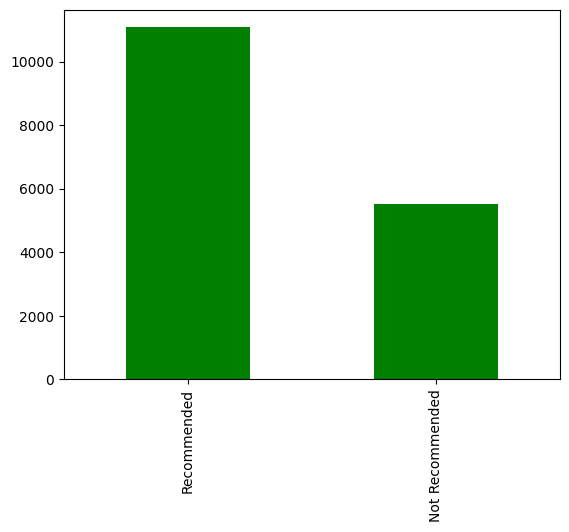

In [10]:
print(df['Recommend'].value_counts())
df['Recommend'].value_counts().plot.bar(color='green')